### Fusion of pheno and readconts dataset, in order to achive the ultimate dataset for HF predictions

In [2]:
import pandas as pd
import numpy as np

#### Load and pre-processing of pheno dataset

In [3]:
# Load dataset
pheno_train = pd.read_csv("train/pheno_training.csv")
pheno_test = pd.read_csv("test/pheno_test.csv")
# Drop na values
pheno_train = pheno_train.dropna()
pheno_test = pheno_test.dropna()
var = ["Event", "Event_time"]
pheno_train_y = pheno_train.PrevalentHFAIL + pheno_train.Event # data target with the patients that had HF before and after the first data collecting
pheno_train_y = pheno_train_y.map({2: 1, 0: 0, 1: 1}) # make the variable boolean
pheno_train_X = pheno_train.iloc[: , 1:] # Dropping the name of the patients
pheno_train_X = pheno_train_X.drop(columns = ["Event", "Event_time", "PrevalentHFAIL"]) # dropping the variables that we want to predict and event_time doesnt make sense  
pheno_test_y = pheno_test.PrevalentHFAIL + pheno_test.Event # data target with the patients that had HF before and after the first data collecting
pheno_test_y = pheno_test_y.map({2: 1, 0: 0, 1: 1}) # make the variable boolean
pheno_test_X = pheno_test.iloc[: , 1:] # Dropping the name of the patients
pheno_test_X = pheno_test_X.drop(columns = ["Event", "Event_time", "PrevalentHFAIL"]) # dropping the variables that we want to predict and event_time doesnt make sense

pheno_train_X

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,SystolicBP,NonHDLcholesterol,Sex
0,53.618,24.127,0.0,0,0.0,0.0,133.077,3.020,0
1,36.811,27.992,0.0,0,0.0,0.0,108.914,5.480,0
2,49.429,23.664,0.0,0,0.0,0.0,110.064,4.388,1
3,48.842,26.804,0.0,0,0.0,0.0,128.059,5.119,0
4,60.738,29.862,0.0,0,0.0,0.0,169.913,5.740,1
...,...,...,...,...,...,...,...,...,...
3610,33.802,37.049,0.0,0,0.0,0.0,109.080,3.141,0
3611,69.249,36.800,0.0,0,1.0,0.0,145.953,5.478,1
3612,28.561,26.463,0.0,0,0.0,0.0,124.091,4.870,1
3613,70.278,31.945,0.0,1,0.0,0.0,142.038,2.492,0


#### Load and pre-processing of readcounts dataset

In [4]:
# Load dataset
readcounts_train = pd.read_csv("train/readcounts_training.csv")
readcounts_test = pd.read_csv("test/readcounts_test.csv")
# get indexes of the rows without nan values
inds_train = pheno_train.dropna().index
inds_test = pheno_test.dropna().index
# data structure organization - train
pheno_train_y = pheno_train.PrevalentHFAIL[inds_train]
readcounts_train_X = readcounts_train.iloc[:, 1:].T # tranpose dataset for compablility
readcounts_train_X.columns = list(readcounts_train["Unnamed: 0"]) # renaming columns for acessibility
readcounts_train_X = readcounts_train_X.iloc[inds_train] # using only rows without nan
# data structure organization - test
pheno_test_y = pheno_test.PrevalentHFAIL[inds_test]
readcounts_test_X = readcounts_test.iloc[:, 1:].T # tranpose dataset for compablility
readcounts_test_X.columns = list(readcounts_test["Unnamed: 0"]) # renaming columns for acessibility
readcounts_test_X = readcounts_test_X.iloc[inds_test] # using only rows without nan

In [5]:
# feature selecting of readcounts dataset usein  SelectFpr()
import sklearn
from sklearn.feature_selection import SelectFpr, chi2
X = readcounts_train_X
y = pheno_train_y
selection_fpr = SelectFpr(chi2, alpha= 0.00001)
X_aux = selection_fpr.fit_transform(X,y)
feature_names_fpr = selection_fpr.get_feature_names_out()
# Delliting features
readcounts_train_selected = readcounts_train_X[feature_names_fpr]
readcounts_test_selected = readcounts_test_X[feature_names_fpr]
# Changing row names to the same
row_names_train = readcounts_train_selected.index
row_names_test = readcounts_test_selected.index
pheno_train_X.index = row_names_train
pheno_test_X.index = row_names_test


In [6]:
# Merging the datasets
new_df_train = pd.merge(pheno_train_X, readcounts_train_selected, left_index=True, right_index=True)
new_df_test = pd.merge(pheno_test_X, readcounts_test_selected, left_index=True, right_index=True)
new_df_test

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,SystolicBP,NonHDLcholesterol,Sex,k__Archaea;p__Euryarchaeota;c__Halobacteria;o__Halobacteriales;f__Haloarculaceae;g__Halapricum;s__Halapricum_salinum,...,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;s__Pantoea_sp._PSNIH2,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Morganellaceae;g__Xenorhabdus;s__Xenorhabdus_nematophila,k__BacteriaPlasmid;p__Spirochaetes;c__Spirochaetia;o__Spirochaetales;f__Spirochaetaceae;g__Treponema;s__Treponema_succinifaciens,"k__Viruses;p__dsDNA_viruses,_no_RNA_stage;c__Caudovirales;o__;f__;g__;s__",k__Viruses;p__ssDNA_viruses;c__Inoviridae;o__;f__;g__;s__,k__Viruses;p__ssDNA_viruses;c__Microviridae;o__;f__;g__;s__,"k__Viruses;p__ssRNA_viruses;c__ssRNA_positive-strand_viruses,_no_DNA_stage;o__Nidovirales;f__Coronaviridae;g__;s__","k__Viruses;p__ssRNA_viruses;c__ssRNA_positive-strand_viruses,_no_DNA_stage;o__Picornavirales;f__Picornaviridae;g__Enterovirus;s__Enterovirus_H",k__Viruses;p__unclassified_bacterial_viruses;c__Enterobacteria_phage_YYZ-2008;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-2;o__;f__;g__;s__
Simulated_2211,73.860,30.140,1.0,1,0.0,0.0,154.046,5.010,0,14,...,0,0,0,1710,0,0,0,0,0,0
Simulated_1629,48.070,18.252,1.0,0,0.0,0.0,184.064,3.922,0,31,...,0,0,0,175,0,0,0,0,0,0
Simulated_1690,49.060,25.911,0.0,0,0.0,0.0,126.922,5.119,1,86,...,2,0,0,446,0,0,0,0,4,0
Simulated_1367,58.499,25.739,0.0,0,0.0,0.0,141.003,3.890,1,22,...,0,0,0,625,0,2,0,0,0,0
Simulated_3387,47.242,29.227,0.0,0,0.0,0.0,143.021,3.611,1,10,...,0,0,0,198,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1628,56.091,25.580,1.0,0,0.0,0.0,169.903,4.480,1,29,...,0,0,0,29,0,0,0,0,0,0
Simulated_3424,46.889,22.762,0.0,0,0.0,0.0,122.995,3.669,0,747,...,0,0,0,152,0,3,0,0,0,0
Simulated_2215,70.841,24.808,0.0,0,0.0,0.0,190.934,6.069,1,504,...,1,0,0,93,0,1,0,0,0,0
Simulated_3426,25.920,20.520,0.0,0,0.0,0.0,117.032,2.789,1,23,...,0,0,0,23,0,0,0,0,0,0


### SMOTE

In [9]:
# SMOTE -> used for unbalanced data sets 
# Synthetic Minority Over-sampling Technique
from collections import Counter
print('Original dataset shape %s' % Counter(pheno_train_y))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
new_df_train, pheno_train_y = sm.fit_resample(new_df_train, pheno_train_y)
print('Resampled dataset shape %s' % Counter(pheno_train_y))


Original dataset shape Counter({0.0: 3448, 1.0: 92})
Resampled dataset shape Counter({0.0: 3448, 1.0: 3448})


### Unsupervised learning
#### PCA

[0.32726774 0.12031756 0.09981608 0.08190192]


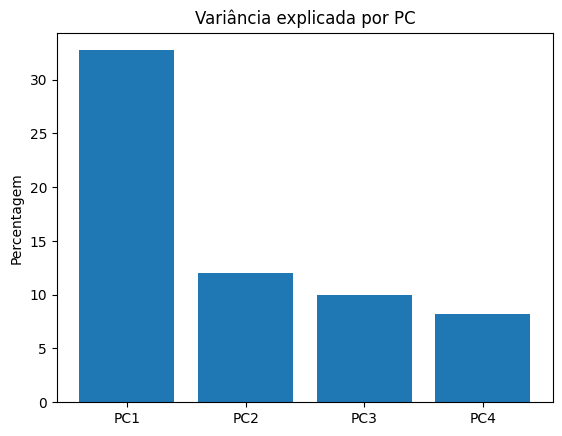

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n=4
pca_iris = PCA(n_components=n)
pca_iris.fit(new_df_train)
x_reduced = pca_iris.transform(new_df_train)


print(pca_iris.explained_variance_ratio_)  
plt.bar(range(n), pca_iris.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

## Machine learning

#### Logistic Regression

In [11]:
from sklearn import linear_model
from sklearn.metrics import recall_score

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(new_df_train, pheno_train_y)
logistic_prev = logistic.predict(new_df_test)

print("Recall score:", recall_score(pheno_test_y, logistic_prev))

Recall score: 0.07894736842105263


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### SVM

In [12]:
from sklearn import svm

SVM = svm.SVC(gamma=0.001, C=100.)
SVM = SVM.fit(new_df_train, pheno_train_y)
svm_pred = SVM.predict(new_df_test)
print("Recall score:", recall_score(pheno_test_y, svm_pred))

Recall score: 0.0


#### K Neighbors Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(new_df_train, pheno_train_y)
knn_pred = knn.predict(new_df_test)
print("Recall score:", recall_score(pheno_test_y, knn_pred))

Recall score: 0.15789473684210525


#### Decision tree

In [15]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(new_df_train, pheno_train_y)
preds_tree = tree_model.predict(new_df_test)
print("Recall score:", recall_score(pheno_test_y, preds_tree))

Recall score: 0.10526315789473684


#### Ensemble - Random Forest Classifier

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#AUX
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


rf_model = RandomForestClassifier(n_estimators=100)
param_dist = {"max_depth": [2, 3, None], "max_features": [2,4,6], "min_samples_split": [2,4,6],
              "min_samples_leaf": [2,4,6], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

rand_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv = 5)
rand_search =rand_search.fit(new_df_train, pheno_train_y)
print (rand_search.best_estimator_)
report(rand_search.cv_results_)
print(rand_search.score(new_df_test, pheno_test_y))

RandomForestClassifier(criterion='entropy', max_features=4, min_samples_leaf=4,
                       min_samples_split=4)
Model with rank: 1
Mean validation score: 1.000 (std: 0.001)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.999 (std: 0.001)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 6, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.999 (std: 0.001)
Parameters: {'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 6, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}

0.9784580498866213


In [17]:
# Rank 1 score of ensemble random forest
rf_model_best = RandomForestClassifier(n_estimators=100, min_samples_split = 4, min_samples_leaf= 4, max_features= 4, max_depth= None, criterion = 'entropy', bootstrap= True)
rf_model_best = rf_model_best.fit(new_df_train, pheno_train_y)
preds_rf_model = rf_model_best.predict(new_df_test)

print("Recall score:", recall_score(pheno_test_y, preds_rf_model))

Recall score: 0.0


## Deep Learning

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50, 20))
scores = cross_val_score(mlp, new_df_train, pheno_train_y, cv = 5)
print(scores.mean())


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarn

0.5052264295698417


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
